In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

# KSD standard kernel

In [ ]:
np.random.seed(2024)

In [ ]:
# simulate sampling distribution for stat
stats_ls_all_eps = []
eps_ls = [0.001, 0.005, 0.01, 0.05, 0.1]
nreps = 1000

for eps in eps_ls:
    stat_ls = []
    
    ###
    mean1 = np.zeros((dim,)) # data
    mean2 = np.zeros((dim,)) # model
    
    Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
    n_outlier = max(1, int(n * eps))
    Xs[:, :n_outlier] = outlier

    score_fn = lambda x: - (x - mean2)
    ###
    
    kernel = kernels.RBF(sigma_sq=2.)
    ksd = metrics.KSD(kernel, score_fn=score_fn)
    for X in tqdm(Xs):
        stat_ls.append(ksd(X, X, vstat=True))

    stats_ls_all_eps.append(stat_ls)

# KSD tilted kernel

In [138]:
def stats_against_outliers(outliers_ls, kernel_name, nreps, eps=0.01, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for outlier in outliers_ls:
        stat_ls = []
        
        ###
        mean1 = np.zeros((dim,)) # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        n_outlier = max(1, int(n * eps))
        Xs[:, :n_outlier] = outlier
    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [18]:
np.random.seed(2024)

In [19]:
# # simulate sampling distribution for stat
# # res_ol = {"RBF": [], "tilted": []}
# stats_ls_all_ol = []
# outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]
# nreps = 10

# for outlier in outliers_ls:
#     stat_ls = []
    
#     ###
#     mean1 = np.zeros((dim,)) # data
#     mean2 = np.zeros((dim,)) # model
    
#     eps = 0.01
#     Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
#     n_outlier = max(1, int(n * eps))
#     Xs[:, :n_outlier] = outlier

#     score_fn = lambda x: - (x - mean2)
#     ###
    
#     score_weight_fn = kernels.ScoreWeightFunction(score_fn)
#     kernel0 = kernels.RBF(sigma_sq=2.)
#     kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
    
#     ksd = metrics.KSD(kernel, score_fn=score_fn)
#     for X in tqdm(Xs):
#         stat_ls.append(ksd(X, X))

#     stats_ls_all_ol.append(stat_ls)

In [136]:
outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]

In [139]:
stats_ls_all_ol_tilted_null = stats_against_outliers([0.], "tilted", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [142]:
stats_ls_all_ol_tilted = stats_against_outliers(outliers_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [50]:
stats_ls_all_ol_rbf_null = stats_against_outliers([0.], "rbf", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
stats_ls_all_ol_rbf = stats_against_outliers(outliers_ls, "rbf", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [150]:
res_ol = {"tilted": stats_ls_all_ol_tilted, "rbf": stats_ls_all_ol_rbf, 
          "tilted_null": stats_ls_all_ol_tilted_null, "rbf_null": stats_ls_all_ol_rbf_null}

In [252]:
# import pickle
# pickle.dump(res_ol, open("../res/ustats_outlier.pkl", "wb"))
# ustats_outlier = pickle.load(open("../res/ustats_outlier.pkl", "rb"))

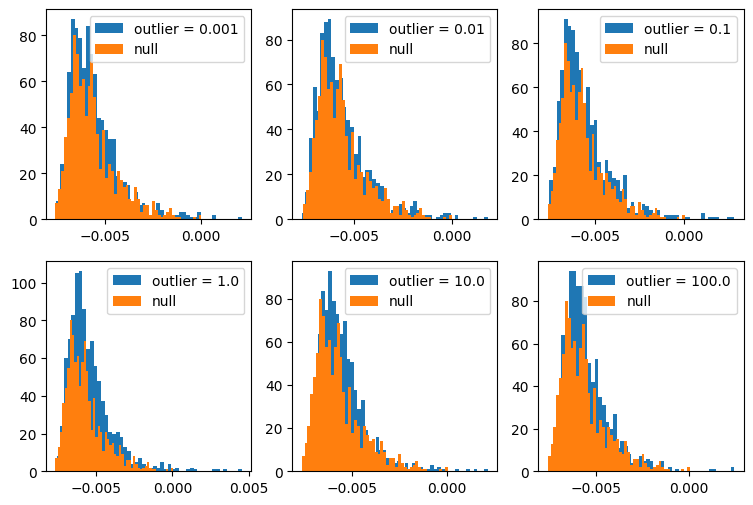

In [192]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["tilted_null"][0], bins=50, label=f"null")
    # ax.set_xlim(0., 0.11)
    ax.legend()

# plt.savefig("../figs/ustats_ol_tilted.pdf")

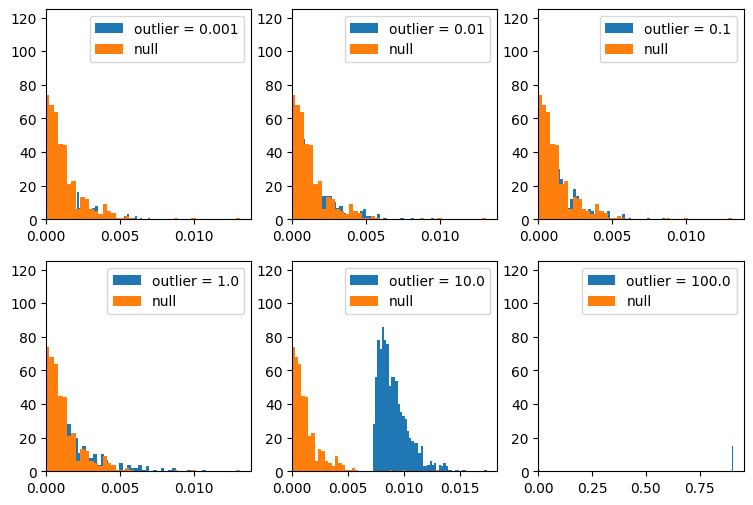

In [193]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["rbf"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["rbf_null"][0], bins=50, label=f"null")
    ax.set_xlim(0.)
    ax.legend()

# plt.savefig("../figs/ustats_ol_rbf.pdf")

#### Check power

In [164]:
def stats_mean_shift(mean_ls, kernel_name, nreps, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for mean in mean_ls:
        stat_ls = []
        
        ###
        mean1 = np.eye(dim)[0] * mean # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [183]:
np.random.seed(2024)

In [184]:
mean_ls = [1e-2, 1e-1, 1., 10., 100., 1000.]

In [ ]:
stats_ls_all_ms_tilted = stats_mean_shift(mean_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
plt.plot(mean_ls, [np.mean(rr) for rr in stats_ls_all_ms_tilted])
plt.xscale("log")

In [ ]:
res_ms = {"tilted": stats_ls_all_ms_tilted,  
          "tilted_null": stats_ls_all_ol_tilted_null}

In [ ]:
# pickle.dump(res_ms, open("../res/ustats_ms.pkl", "wb"))

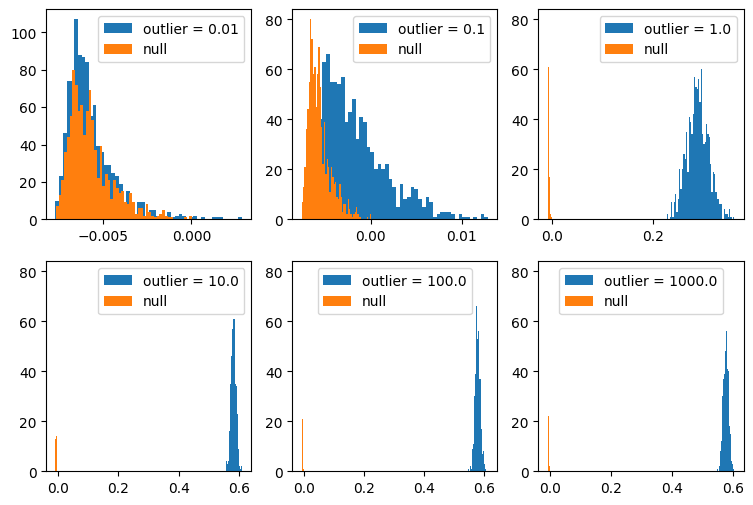

In [194]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(mean_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ms["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ms["tilted_null"][0], bins=50, label=f"null")
    ax.legend()

# plt.savefig("../figs/ustats_ms_tilted.pdf")

#### Check that the simple test with tilted kernel is asymptotically valid
Need $\epsilon_{m, n} \to 0$, $m \to \infty$

In [2]:
def simple_test_outliers(outliers_ls, kernel_name, nreps, eps=0.01, dim=1, n=1000):
    res = {"stats": [], "pval": [], "boot_stat": []}
    
    for outlier in outliers_ls:
        stat_ls = []
        pval_ls = []
        boot_stats_ls = []
        
        ###
        mean1 = np.zeros((dim,)) # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        n_outlier = max(1, int(n * eps))
        Xs[:, :n_outlier] = outlier
    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        wild_boot = boot.WildBootstrap(ksd)
        for X in tqdm(Xs):
            # pval, stat = wild_boot.pval(X, X, return_test_stat=True)
            pval, stat, boot_stats = wild_boot.pval(X, X, return_boot=True, return_stat=True)
            stat_ls.append(stat)
            pval_ls.append(pval)
            boot_stats_ls.append(boot_stats)
    
        res["stats"].append(stat_ls)
        res["pval"].append(pval_ls)
        res["boot_stat"].append(boot_stats_ls)

    return res

In [6]:
np.random.seed(2024)

In [7]:
outliers_ls = [0.1] # [0.001, 0.01, 0.1, 1., 10., 100.]

In [8]:
res_null_tilted = simple_test_outliers([0.], "tilted", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


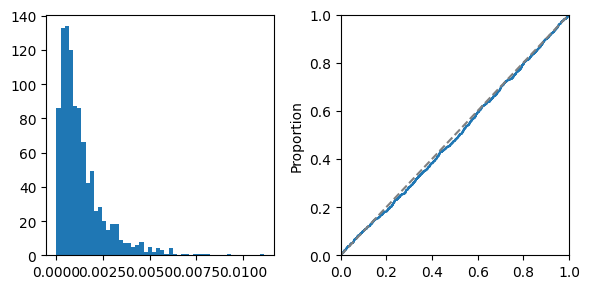

In [30]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

ax = axes[0]
_ = ax.hist(res_null_tilted["stats"], bins=50)

ax = axes[1]
# _ = ax.hist(res_null_tilted["pval"], bins=50)
sns.ecdfplot(ax=ax, x=np.array(res_null_tilted["pval"][0]))
ax.plot([0., 1.], [0., 1.], linestyle="--", color="grey")
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)

plt.tight_layout()

In [268]:
res_ol_tilted = simple_test_outliers(outliers_ls, "tilted", nreps=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [317]:
score_weight_fn = kernels.PolyWeightFunction()
kernel0 = kernels.RBF(sigma_sq=2.)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

In [318]:
xx = np.array([[-1.], [0.], [1.]])
kernel(xx, xx)

array([[0.5       , 0.42888194, 0.06766764],
       [0.42888194, 1.        , 0.42888194],
       [0.06766764, 0.42888194, 0.5       ]])

In [321]:
# np.exp(-0.5) * 1/np.sqrt(2.)
0.5 * np.exp(-0.5 * 2**2)

0.06766764161830635

In [323]:
kernel.grad_first(xx, xx)[:, :, 0]

grad_first [[ 0.25        0.64332291  0.1691691 ]
 [-0.42888194  0.          0.42888194]
 [-0.1691691  -0.64332291 -0.25      ]]


array([[ 0.25      ,  0.64332291,  0.1691691 ],
       [-0.42888194,  0.        ,  0.42888194],
       [-0.1691691 , -0.64332291, -0.25      ]])

In [327]:
import jax.numpy as jnp
import jax

In [449]:
np.random.seed(2024)
xx = np.random.normal(size=(3, 1))
yy = np.squeeze(xx)

In [450]:
def k_fn(yy):
    yy = jnp.reshape(yy, (-1, 1))
    return jnp.squeeze(kernel(yy, xx[1:2]))

check_grad_first = jax.vmap(jax.grad(k_fn))
check_grad_first(yy)

Array([-0.36813366, -0.30942607,  0.5750677 ], dtype=float32)

In [451]:
kernel.grad_first(xx, xx)[:, :, 0]

grad_first [[-0.11659439 -0.36813372 -0.20285669]
 [ 0.12158662 -0.30942607 -0.71926355]
 [ 0.18114224  0.57506776  0.18611193]]


Array([[-0.11659439, -0.36813372, -0.20285669],
       [ 0.12158662, -0.30942607, -0.71926355],
       [ 0.18114224,  0.57506776,  0.18611193]], dtype=float32)

In [452]:
def k_fn2(yy):
    yy = jnp.reshape(yy, (-1, 1))
    return jnp.squeeze(kernel(xx[1:2], yy))

check_grad_second = jax.vmap(jax.grad(k_fn2))
check_grad_second(yy)

Array([-0.36813363, -0.30942604,  0.5750677 ], dtype=float32)

In [453]:
kernel.grad_second(xx, xx)[:, :, 0]

grad_second [[-0.11659439  0.12158664  0.18114224]
 [-0.3681337  -0.30942607  0.5750677 ]
 [-0.20285669 -0.7192636   0.18611193]]


Array([[-0.11659439,  0.12158664,  0.18114224],
       [-0.3681337 , -0.30942607,  0.5750677 ],
       [-0.20285669, -0.7192636 ,  0.18611193]], dtype=float32)

In [460]:
def k_fn3(zz):
    xx, yy = zz[0], zz[1]
    xx = jnp.reshape(xx, (-1, 1))
    yy = jnp.reshape(yy, (-1, 1))
    return jnp.squeeze(kernel(xx, yy))

# check_gradgrad = jax.vmap(jax.hessian(jax.grad(k_fn3)))
check_gradgrad = jax.vmap(jax.hessian(k_fn3))
check_grad2 = jax.vmap(jax.grad(k_fn3))
zz = jnp.concatenate([xx[0:1], xx[1:2]], axis=-1)
gg = check_gradgrad(zz)
gg.shape

# def k_fn3(xx):
#     xx = jnp.reshape(xx, (-1, 1))
#     res = jnp.squeeze(kernel(xx, xx))
#     return res

# check_gradgrad = jax.vmap(jax.hessian(jax.grad(k_fn3)))
# gg = check_gradgrad(xx)
# gg.shape

(1, 2, 2)

In [461]:
gg

Array([[[ 0.2700297 ,  0.101596  ],
        [ 0.10159603, -0.26468498]]], dtype=float32)

In [462]:
kernel.gradgrad(xx, xx)

Array([[ 0.3158023 ,  0.10159604, -0.330751  ],
       [ 0.10159605,  0.795601  , -0.3068463 ],
       [-0.330751  , -0.3068463 ,  0.99701244]], dtype=float32)

In [399]:
def m_fn(xx):
    return jnp.squeeze(kernel.weight_fn(jnp.reshape(xx, (-1, 1))))

grad_m = jax.vmap(jax.grad(m_fn))
grad_m(xx)

Array([[ 0.35355338],
       [-0.        ],
       [-0.35355338]], dtype=float32)

In [400]:
kernel.weight_fn.grad(xx)

Array([[ 0.35355338],
       [-0.        ],
       [-0.35355338]], dtype=float32)

# Deviation threshold

In [208]:
def make_contam_score(mu, eps):
    """
    score function of (1-eps)*p(x) + eps*r(x), where p, r are Gaussians.
    """
    mu_norm_sq = np.sum(mu**2)
    mu_pd = np.reshape(mu, (1, -1))
    def contam_score(x):
        exp = np.exp(- 0.5 * mu_norm_sq + np.sum(mu_pd * x))
        num = - (1 - eps) * x - eps * (x - mu_pd) * exp
        denom = 1 - eps + eps * exp
        return num / denom
    return contam_score

def stats_mean_shift_threshold(mean_ls, kernel_name, nreps, dim=1, n=1000, model="contam_data":
    stats_ls_all_ol = []
    threshold_res = {"threshold": [], "tau": []}
    
    for mean in mean_ls:
        stat_ls = []
        
        ###
        if model == "contam_data":
            mean1 = np.eye(dim)[0] * mean # data
            mean2 = np.zeros((dim,)) # model
            
            Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
            score_fn = lambda x: - (x - mean2)

        elif model == "contam_score":
            mean1 = np.eye(dim)[0] * mean # data
            mean2 = np.zeros((dim,)) # model
            
            Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
            score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

        # compute deviation threshold
        test_thres = ksd.test_threshold(n)
        tau = ksd.tau
        threshold_res["threshold"].append(test_thres)
        threshold_res["tau"].append(tau)

    return stats_ls_all_ol, threshold_res

In [212]:
np.random.seed(2024)

In [213]:
mean_ls = [1e-1, 1., 10., 100.]
stats_ls_all_ms_tilted, thresh_res_ms = stats_mean_shift_threshold(mean_ls, "tilted", nreps=200)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

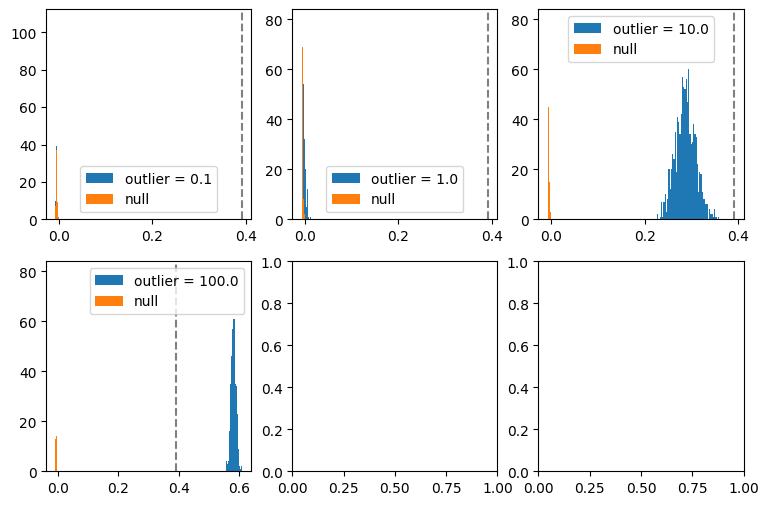

In [214]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(mean_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ms["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ms["tilted_null"][0], bins=50, label=f"null")
    ax.axvline(thresh_res_ms["threshold"][i], color="gray", linestyle="--")
    ax.legend()


In [228]:
def ksd_experiment_single(kernel_class, weight_fn_class, Xs, score_fn, theta, nboot=500, alpha=0.05):
    res = {
        "deviation": {"val": [], "threshold": [], "rej": [], "tau": []},
    }

    for X in tqdm(Xs, total=Xs.shape[0]):
        weight_fn = weight_fn_class()
        kernel0 = kernel_class(sigma_sq=2.)
        kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=weight_fn)
    
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        val = ksd(X, X, vstat=True)
        threshold = ksd.test_threshold(X.shape[0])
        
        # 1. deviation bound
        # rej = mmd.reverse_test(X, Y, theta, alpha)
        rej = np.float32(val > threshold)
        
        # save results
        res["deviation"]["val"].append(val)
        res["deviation"]["threshold"].append(threshold)
        res["deviation"]["rej"].append(rej)
        res["deviation"]["tau"].append(ksd.tau)
        
    return res

def ksd_experiment(kernel_class, weight_fn_class, Xs, score_fns, theta, keys, nboot=500):
    """
    Xs: [array(nrep, n, d), ...]
    Ys: [array(nrep, n, d), ...]
    """
    res = {}
    for Xs_i, score_fn_i, kk in zip(Xs, score_fns, keys):
        print("key:", kk)
        res[kk] = ksd_experiment_single(kernel_class, weight_fn_class, Xs_i, score_fn_i, theta, nboot=nboot)

    return res
    

In [246]:
np.random.seed(2024)

In [247]:
nrep = 200
n = 1000
dim = 1
mean1 = np.zeros((dim,)) # data
mean2 = np.zeros((dim,)) # model

mean_ls = [1., 1.2, 1.4, 1.6, 1.8, 2.]

### Gaussian loc
Xs = [
    np.random.multivariate_normal(np.eye(dim)[0] * m, np.eye(dim), (nrep, n)) for m in mean_ls
]

score_fns = [lambda x: - (x - mean2) for _ in range(nrep)]

### Gaussian with outliers
# score_fns = [lambda x: - (x - mean2) for _ in range(nrep)]

# eps = 0.01
# outlier = 10.
# Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nrep, n))
# n_outlier = max(1, int(n * eps))
# Xs[:, :n_outlier] = outlier
###

weight_fn_class = kernels.PolyWeightFunction
kernel_class = kernels.RBF

In [248]:
res_ms = ksd_experiment(kernel_class, weight_fn_class, Xs, score_fns, theta=0., keys=mean_ls)

key: 1.0


  0%|          | 0/200 [00:00<?, ?it/s]

key: 1.2


  0%|          | 0/200 [00:00<?, ?it/s]

key: 1.4


  0%|          | 0/200 [00:00<?, ?it/s]

key: 1.6


  0%|          | 0/200 [00:00<?, ?it/s]

key: 2.0


  0%|          | 0/200 [00:00<?, ?it/s]

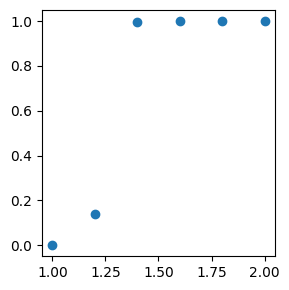

In [251]:
# expect to see power for larger mean shifts
fig, ax = plt.subplots(figsize=(3, 3))

rej_rate = [np.mean(res_ms[kk]["deviation"]["rej"]) for kk in mean_ls]
ax.scatter(mean_ls, rej_rate)
# ax.set_xscale("log")

plt.tight_layout()

# Check KSD differences with and without contamination

In [258]:
def make_contam_score(mu, eps):
    mu_norm_sq = np.sum(mu**2)
    mu_pd = np.reshape(mu, (1, -1))
    def contam_score(x):
        exp = np.exp(- 0.5 * mu_norm_sq + np.sum(mu_pd * x))
        num = - (1 - eps) * x - eps * (x - mu_pd) * exp
        denom = 1 - eps + eps * exp
        return num / denom
    return contam_score